In [1]:
import pandas as pd
import numpy as np
import math
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

c:\Users\uif46868\Anaconda3\envs\MWML\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\uif46868\Anaconda3\envs\MWML\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
c:\Users\uif46868\Anaconda3\envs\MWML\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\uif46868\AppData\Local\Temp\ipykernel_11992\2912125278.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


# EDA Before Scaling and Hot Encoding

In [2]:
# load in the data
df = pd.read_csv("D:\work\Hackathon\CO2_Estimation\hackathon2023_starter_material\data_folder\co2_emmision_train_data.csv")

# # build the profile report
# profile = pp.ProfileReport(df, title="CO2 Emmision EDA Report")
# profile
# # save the profile report to an HTML file
# profile.to_file("CO2_Emmision_eda_report.html")

In [3]:
# Basic EDA for the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27549 entries, 0 to 27548
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  27549 non-null  float64
 1   Make                                  27549 non-null  object 
 2   Model                                 27549 non-null  object 
 3   Vehicle Class                         27549 non-null  object 
 4   Engine Size (L)                       27226 non-null  float64
 5   Cylinders                             27226 non-null  float64
 6   Transmission                          27549 non-null  object 
 7   Fuel Type                             27329 non-null  object 
 8   Fuel Consumption [City (L/100 km)]    27226 non-null  float64
 9   Fuel Consumption [Hwy (L/100 km)]     27549 non-null  float64
 10  Fuel Consumption [Comb (L/100 km)]    27226 non-null  float64
 11  Fuel Consumptio

In [4]:
print((df.nunique()).shape)


(26,)


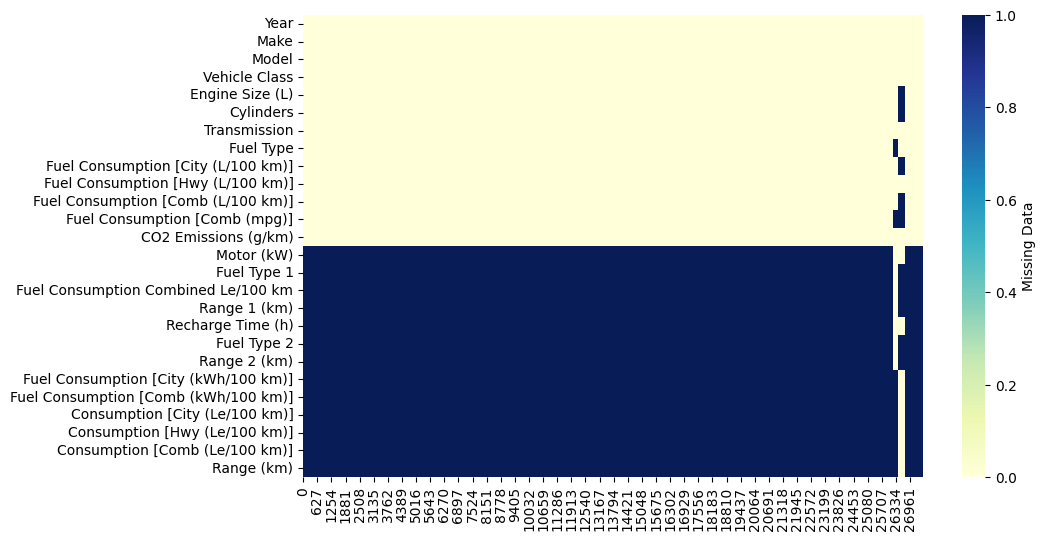

In [5]:
df.isnull().sum()
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)


In [6]:
(df.isnull().sum()/(len(df)))*100

Year                                     0.000000
Make                                     0.000000
Model                                    0.000000
Vehicle Class                            0.000000
Engine Size (L)                          1.172456
Cylinders                                1.172456
Transmission                             0.000000
Fuel Type                                0.798577
Fuel Consumption [City (L/100 km)]       1.172456
Fuel Consumption [Hwy (L/100 km)]        0.000000
Fuel Consumption [Comb (L/100 km)]       1.172456
Fuel Consumption [Comb (mpg)]            1.989183
CO2 Emissions (g/km)                     0.000000
Motor (kW)                              98.010817
Fuel Type 1                             99.183273
Fuel Consumption Combined Le/100 km     99.183273
Range 1 (km)                            99.183273
Recharge Time (h)                       98.010817
Fuel Type 2                             99.183273
Range 2 (km)                            99.183273


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,27549.0,2009.805220,7.771925,1995.0,2004.00,2010.0,2016.0,2022.0
Engine Size (L),27226.0,3.342643,1.340459,0.6,2.20,3.0,4.2,8.4
Cylinders,27226.0,5.830052,1.795808,2.0,4.00,6.0,8.0,16.0
Fuel Consumption [City (L/100 km)],27226.0,13.841405,3.762936,4.0,11.30,13.4,15.9,33.3
Fuel Consumption [Hwy (L/100 km)],27549.0,10.152198,2.908910,3.9,8.30,9.6,11.5,35.0
Fuel Consumption [Comb (L/100 km)],27226.0,12.118200,3.200570,4.0,9.90,11.6,13.9,27.5
Fuel Consumption [Comb (mpg)],27001.0,24.855339,6.693211,10.0,20.00,24.0,28.0,71.0
CO2 Emissions (g/km),27549.0,271.431449,73.451433,0.0,228.00,267.0,313.0,633.0
Motor (kW),548.0,209.905109,171.189660,35.0,80.75,135.0,313.5,829.0
Range 1 (km),225.0,45.133333,34.472297,18.0,27.00,34.0,50.0,203.0


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,27549.0,NaN,NaN,NaN,2009.80522,7.771925,1995.0,2004.0,2010.0,2016.0,2022.0
Make,27549,507,CHEVROLET,2056,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,27549,5435,MUSTANG,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle Class,27549,502,COMPACT,3178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine Size (L),27226.0,NaN,NaN,NaN,3.342643,1.340459,0.6,2.2,3.0,4.2,8.4
Cylinders,27226.0,NaN,NaN,NaN,5.830052,1.795808,2.0,4.0,6.0,8.0,16.0
Transmission,27549,32,A4,5664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel Type,27329,7,X,14916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel Consumption [City (L/100 km)],27226.0,NaN,NaN,NaN,13.841405,3.762936,4.0,11.3,13.4,15.9,33.3
Fuel Consumption [Hwy (L/100 km)],27549.0,NaN,NaN,NaN,10.152198,2.90891,3.9,8.3,9.6,11.5,35.0


In [9]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type',
       'Fuel Type 1', 'Fuel Consumption Combined Le/100 km', 'Fuel Type 2'],
      dtype='object')
Numerical Variables:
['Year', 'Engine Size (L)', 'Cylinders', 'Fuel Consumption [City (L/100 km)]', 'Fuel Consumption [Hwy (L/100 km)]', 'Fuel Consumption [Comb (L/100 km)]', 'Fuel Consumption [Comb (mpg)]', 'CO2 Emissions (g/km)', 'Motor (kW)', 'Range 1 (km)', 'Recharge Time (h)', 'Range 2 (km)', 'Fuel Consumption [City (kWh/100 km)]', 'Fuel Consumption [Comb (kWh/100 km)]', 'Consumption [City (Le/100 km)]', 'Consumption [Hwy (Le/100 km)]', 'Consumption [Comb (Le/100 km)]', 'Range (km)']


Year
Skew : -0.23


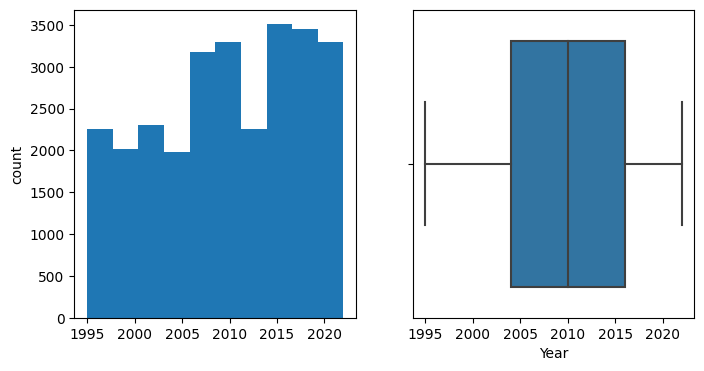

Engine Size (L)
Skew : 0.63


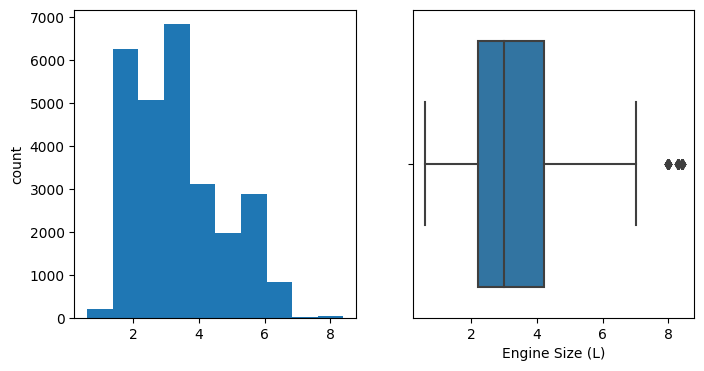

Cylinders
Skew : 0.89


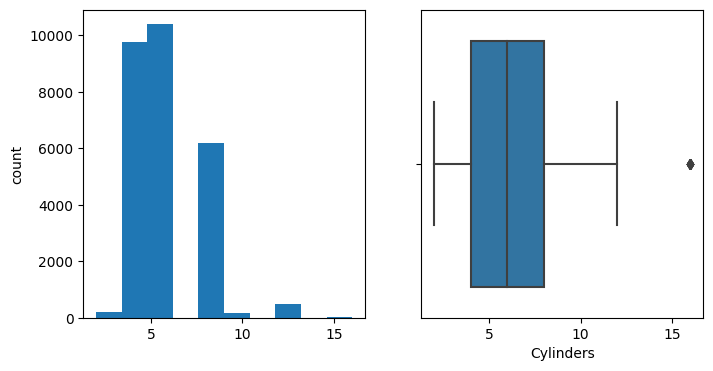

Fuel Consumption [City (L/100 km)]
Skew : 0.67


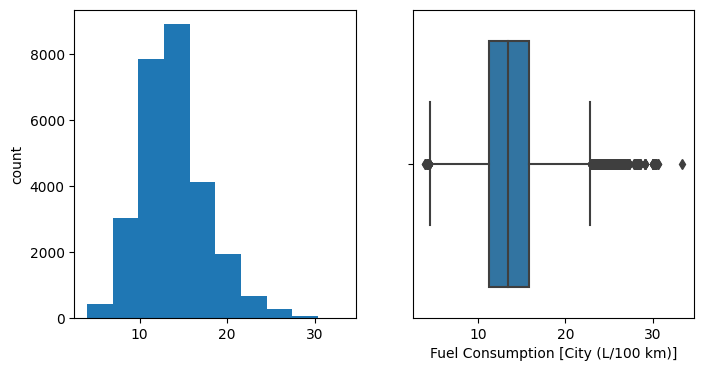

Fuel Consumption [Hwy (L/100 km)]
Skew : 1.55


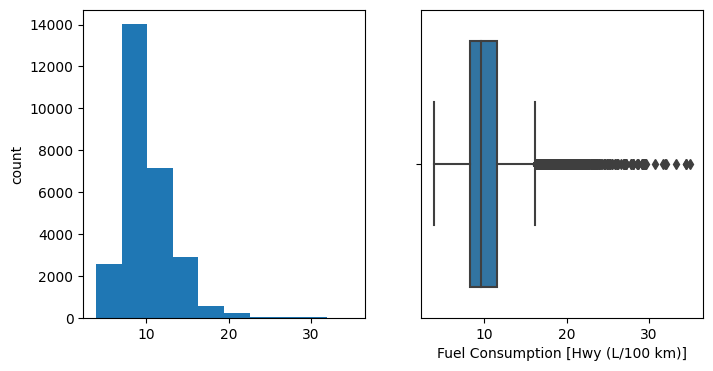

Fuel Consumption [Comb (L/100 km)]
Skew : 0.75


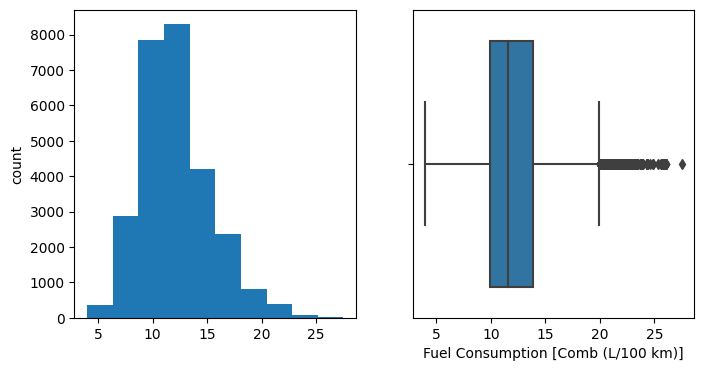

Fuel Consumption [Comb (mpg)]
Skew : 1.14


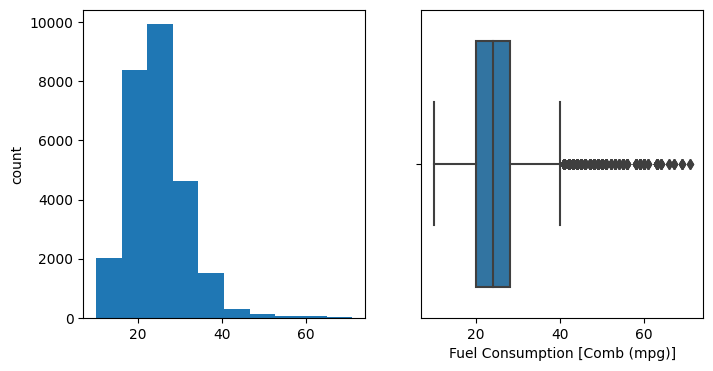

CO2 Emissions (g/km)
Skew : -0.19


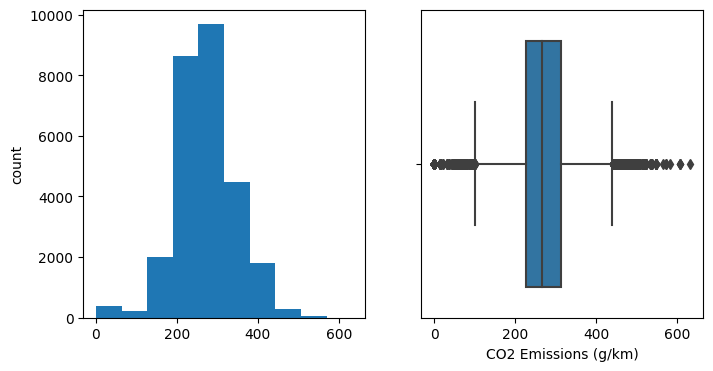

Motor (kW)
Skew : 1.21


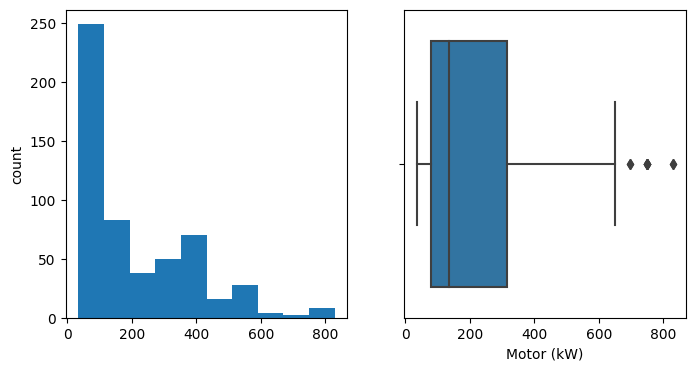

Range 1 (km)
Skew : 3.14


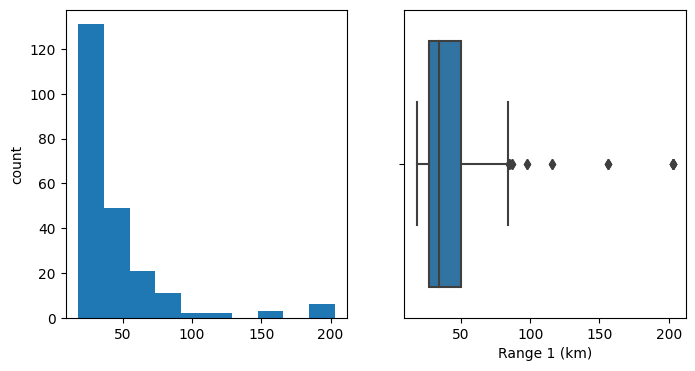

Recharge Time (h)
Skew : 0.21


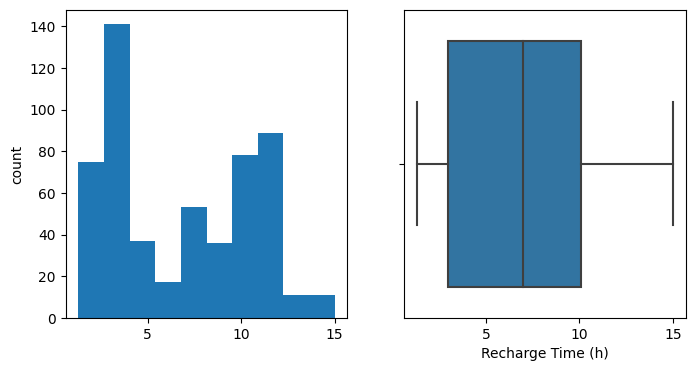

Range 2 (km)
Skew : -0.59


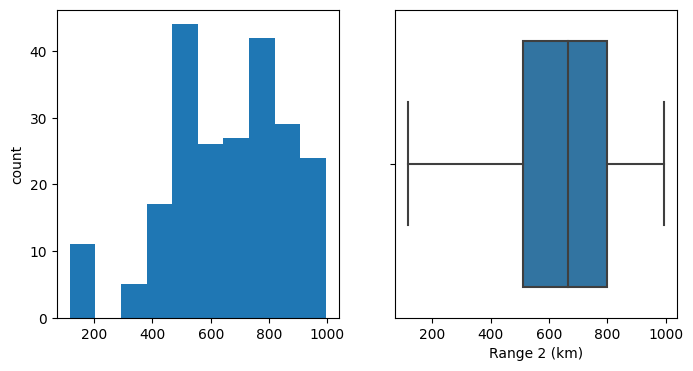

Fuel Consumption [City (kWh/100 km)]
Skew : 0.77


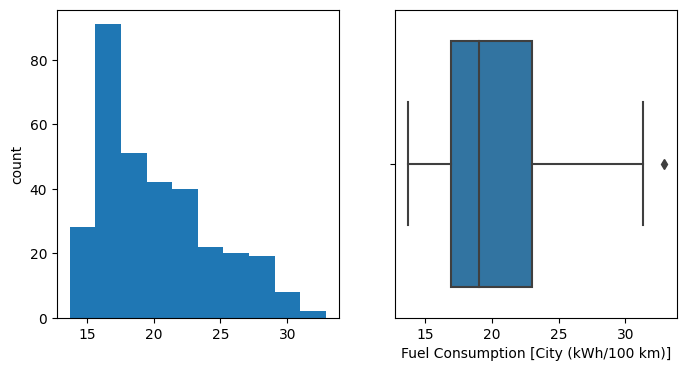

Fuel Consumption [Comb (kWh/100 km)]
Skew : 0.92


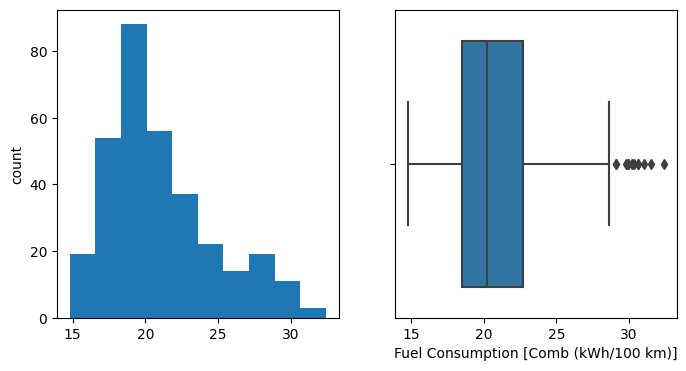

Consumption [City (Le/100 km)]
Skew : 0.78


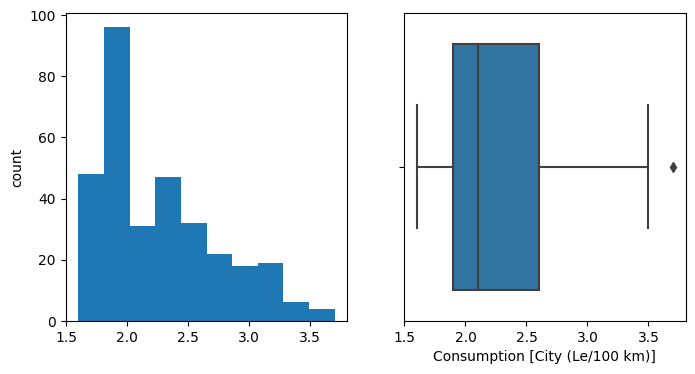

Consumption [Hwy (Le/100 km)]
Skew : 1.12


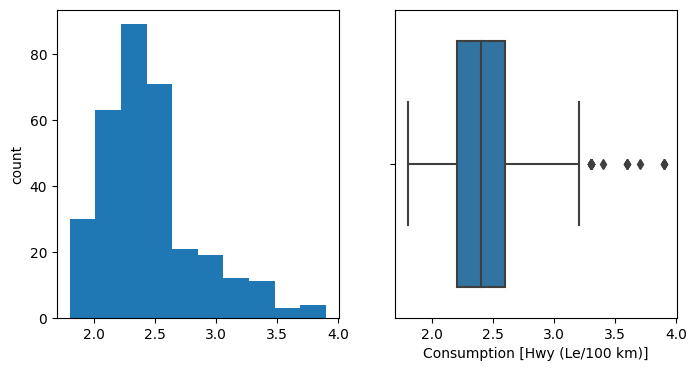

Consumption [Comb (Le/100 km)]
Skew : 0.93


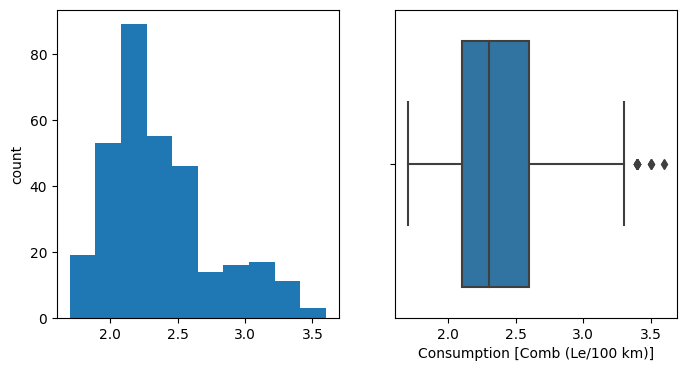

Range (km)
Skew : -0.04


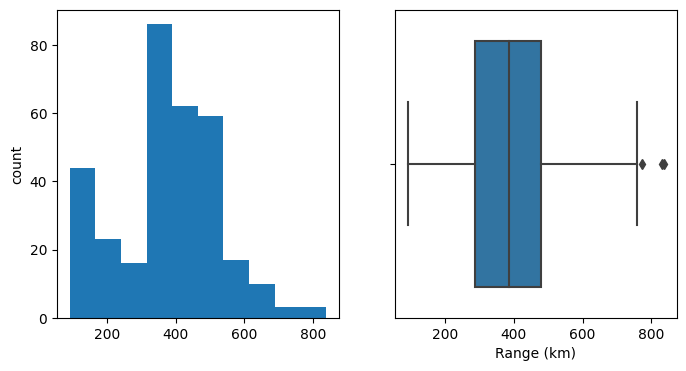

In [10]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (8, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()
plt.show()

In [11]:
# From analysis using the box plot, we can observe the skewness in the feature column, for now we can ignore CO emission.
    # 1. We can observe the skewness and the outliers in the given data.
    # 2. Fuel Consumption has the highest number of outliers. 


In [12]:
df_numerical_data = df.select_dtypes(include='number')
df_categorical_data = df.select_dtypes(exclude='number')

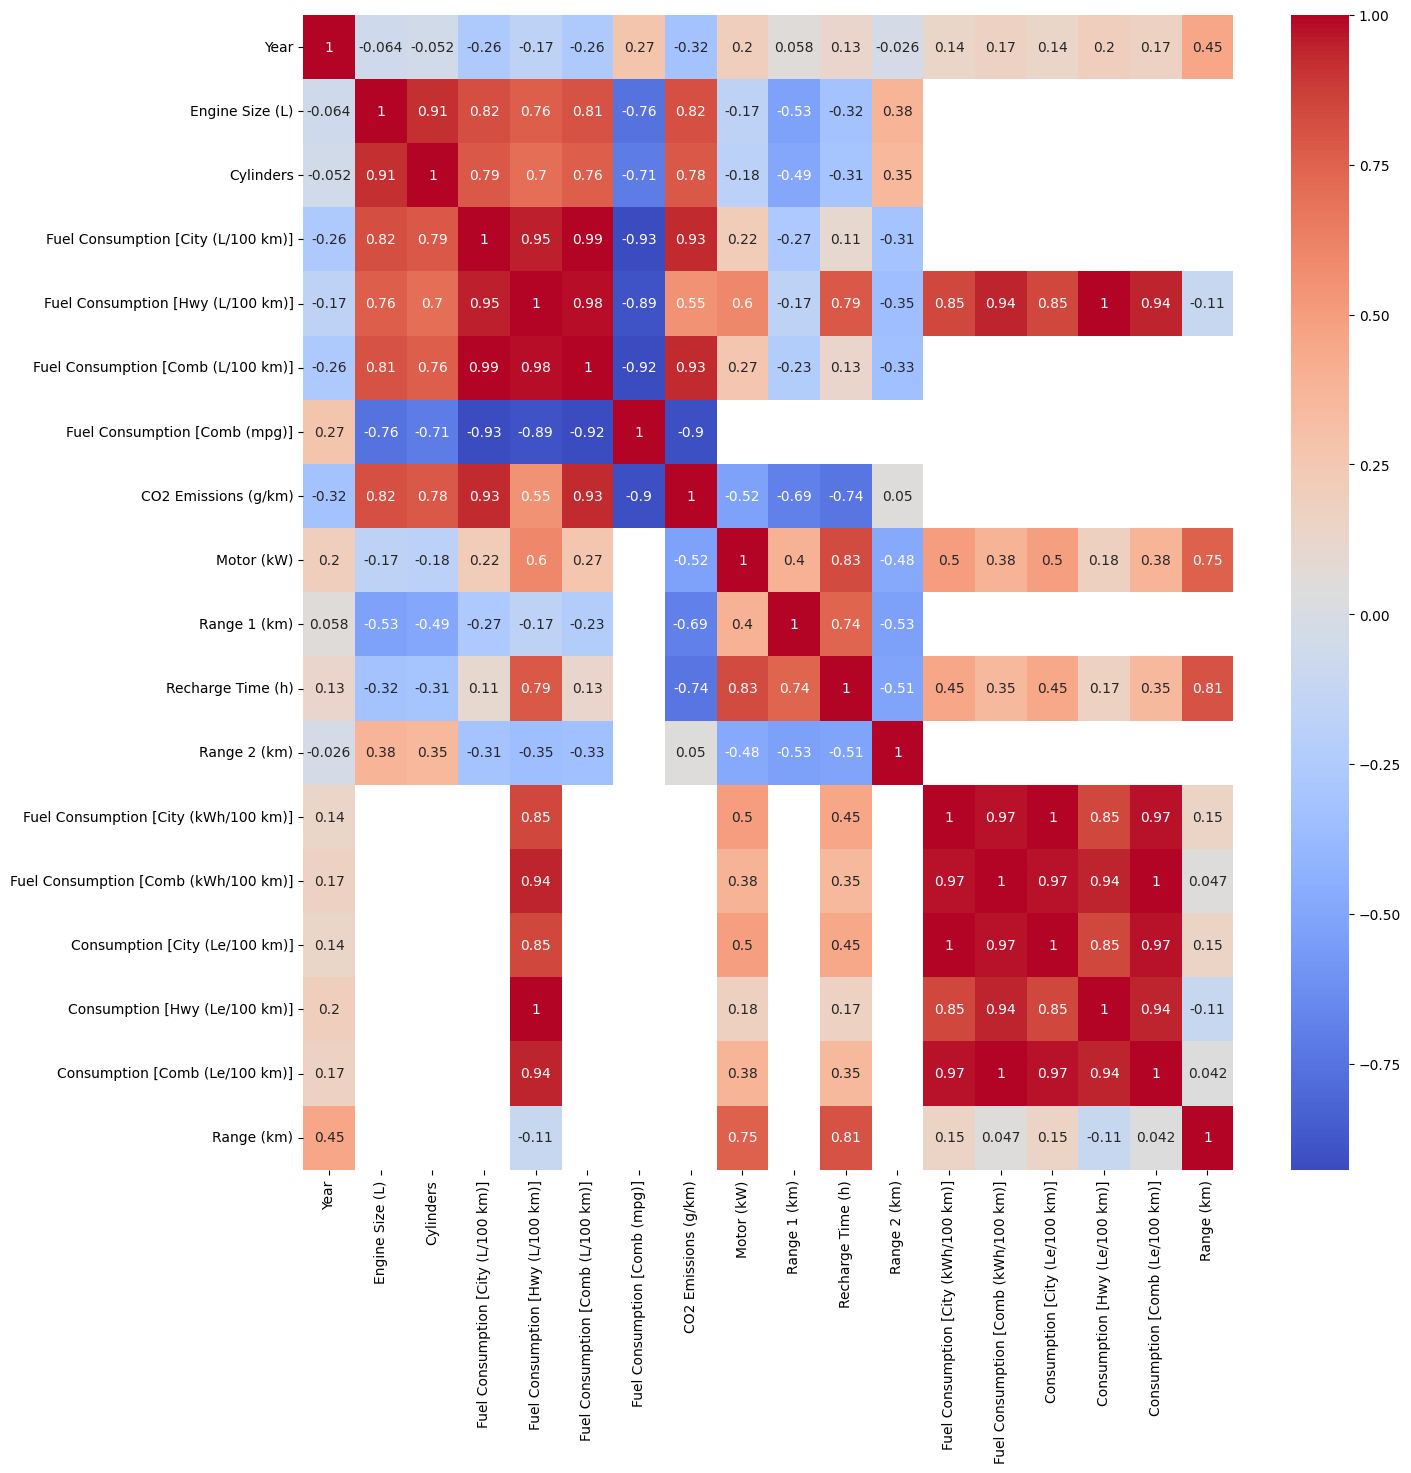

In [13]:
coeff_df_numerical = df_numerical_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data=coeff_df_numerical, cmap='coolwarm', annot=True)
plt.show()

In [14]:
duplicate = df[df.duplicated()]

In [15]:
duplicate

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption [City (L/100 km)],Fuel Consumption [Hwy (L/100 km)],...,Range 1 (km),Recharge Time (h),Fuel Type 2,Range 2 (km),Fuel Consumption [City (kWh/100 km)],Fuel Consumption [Comb (kWh/100 km)],Consumption [City (Le/100 km)],Consumption [Hwy (Le/100 km)],Consumption [Comb (Le/100 km)],Range (km)
19302,2000.0,LAND ROVER,DISCOVERY SERIES II 4X4,SUV,4.0,8.0,A4,Z,19.6,14.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23292,1995.0,NISSAN,AXXESS,MINIVAN,2.4,4.0,M5,X,12.6,9.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26747,1996.0,HYUNDAI,ACCENT,COMPACT,1.5,4.0,M5,X,9.6,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26748,2012.0,AUDI,A4 AVANT,STATION WAGON - SMALL,2.0,4.0,AS8,Z,11.4,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26749,2013.0,TOYOTA,COROLLA MATRIX,STATION WAGON - SMALL,2.4,4.0,A4,X,11.6,9.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27544,2002.0,CHEVROLET,K1500 SILVERADO 4X4,PICKUP TRUCK - STANDARD,4.3,6.0,M5,X,19.9,14.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27545,2011.0,VOLKSWAGEN,PASSAT CC 4MOTION,COMPACT,3.6,6.0,AS6,Z,14.3,9.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27546,2010.0,BMW,550i,MID-SIZE,4.8,8.0,M6,Z,15.6,10.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27547,2005.0,HYUNDAI,ELANTRA,COMPACT,2.0,4.0,A4,X,11.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Enough of EDA, lets Split the Independent and the dependent columns

In [17]:
X = df.loc[:,df.columns != 'CO2 Emissions (g/km)']
y = df.loc[:,df.columns == 'CO2 Emissions (g/km)']

In [18]:
print("Missing Values percentage in the input variable\n", (X.isnull().sum()/(len(X)))*100)

Missing Values percentage in the input variable
 Year                                     0.000000
Make                                     0.000000
Model                                    0.000000
Vehicle Class                            0.000000
Engine Size (L)                          1.172456
Cylinders                                1.172456
Transmission                             0.000000
Fuel Type                                0.798577
Fuel Consumption [City (L/100 km)]       1.172456
Fuel Consumption [Hwy (L/100 km)]        0.000000
Fuel Consumption [Comb (L/100 km)]       1.172456
Fuel Consumption [Comb (mpg)]            1.989183
Motor (kW)                              98.010817
Fuel Type 1                             99.183273
Fuel Consumption Combined Le/100 km     99.183273
Range 1 (km)                            99.183273
Recharge Time (h)                       98.010817
Fuel Type 2                             99.183273
Range 2 (km)                            99.183273
F

In [19]:
print("Missing Values percentage in the Dependent variable\n", (y.isnull().sum()/(len(y)))*100)

Missing Values percentage in the Dependent variable
 CO2 Emissions (g/km)    0.0
dtype: float64


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27549 entries, 0 to 27548
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  27549 non-null  float64
 1   Make                                  27549 non-null  object 
 2   Model                                 27549 non-null  object 
 3   Vehicle Class                         27549 non-null  object 
 4   Engine Size (L)                       27226 non-null  float64
 5   Cylinders                             27226 non-null  float64
 6   Transmission                          27549 non-null  object 
 7   Fuel Type                             27329 non-null  object 
 8   Fuel Consumption [City (L/100 km)]    27226 non-null  float64
 9   Fuel Consumption [Hwy (L/100 km)]     27549 non-null  float64
 10  Fuel Consumption [Comb (L/100 km)]    27226 non-null  float64
 11  Fuel Consumptio

In [21]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27549 entries, 0 to 27548
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CO2 Emissions (g/km)  27549 non-null  float64
dtypes: float64(1)
memory usage: 215.4 KB


# Dropping Some Features like "year"


##### ['Year', 'Engine Size (L)', 'Cylinders', 'Fuel Consumption [City (L/100 km)]', 'Fuel Consumption [Hwy (L/100 km)]', 'Fuel Consumption [Comb (L/100 km)]', 'Fuel Consumption [Comb (mpg)]', 'CO2 Emissions (g/km)', 'Motor (kW)', 'Range 1 (km)', 'Recharge Time (h)', 'Range 2 (km)', 'Fuel Consumption [City (kWh/100 km)]', 'Fuel Consumption [Comb (kWh/100 km)]', 'Consumption [City (Le/100 km)]', 'Consumption [Hwy (Le/100 km)]', 'Consumption [Comb (Le/100 km)]', 'Range (km)']

In [22]:
X_No_Year_numerical_features = X.select_dtypes(include='number').drop(['Year'], axis=1)
X_No_Year_numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27549 entries, 0 to 27548
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Engine Size (L)                       27226 non-null  float64
 1   Cylinders                             27226 non-null  float64
 2   Fuel Consumption [City (L/100 km)]    27226 non-null  float64
 3   Fuel Consumption [Hwy (L/100 km)]     27549 non-null  float64
 4   Fuel Consumption [Comb (L/100 km)]    27226 non-null  float64
 5   Fuel Consumption [Comb (mpg)]         27001 non-null  float64
 6   Motor (kW)                            548 non-null    float64
 7   Range 1 (km)                          225 non-null    float64
 8   Recharge Time (h)                     548 non-null    float64
 9   Range 2 (km)                          225 non-null    float64
 10  Fuel Consumption [City (kWh/100 km)]  323 non-null    float64
 11  Fuel Consumptio

In [23]:
X_No_Year_categorical_features = X.select_dtypes(exclude='number')
X_No_Year_categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27549 entries, 0 to 27548
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Make                                 27549 non-null  object
 1   Model                                27549 non-null  object
 2   Vehicle Class                        27549 non-null  object
 3   Transmission                         27549 non-null  object
 4   Fuel Type                            27329 non-null  object
 5   Fuel Type 1                          225 non-null    object
 6   Fuel Consumption Combined Le/100 km  225 non-null    object
 7   Fuel Type 2                          225 non-null    object
dtypes: object(8)
memory usage: 1.7+ MB


### Scaling the numerical features amd not dropping the missing values and also not splitting into train and val 

In [24]:
X_No_Year_numerical_features.columns

Index(['Engine Size (L)', 'Cylinders', 'Fuel Consumption [City (L/100 km)]',
       'Fuel Consumption [Hwy (L/100 km)]',
       'Fuel Consumption [Comb (L/100 km)]', 'Fuel Consumption [Comb (mpg)]',
       'Motor (kW)', 'Range 1 (km)', 'Recharge Time (h)', 'Range 2 (km)',
       'Fuel Consumption [City (kWh/100 km)]',
       'Fuel Consumption [Comb (kWh/100 km)]',
       'Consumption [City (Le/100 km)]', 'Consumption [Hwy (Le/100 km)]',
       'Consumption [Comb (Le/100 km)]', 'Range (km)'],
      dtype='object')

In [25]:
from sklearn.preprocessing import RobustScaler
transformer_df_numerical_data = RobustScaler().fit(df_numerical_data)
df_numerical_data_transformed = pd.DataFrame(transformer_df_numerical_data.transform(df_numerical_data), columns=df_numerical_data.columns, index=df_numerical_data.index)

In [26]:
df_numerical_data_transformed = df_numerical_data_transformed.fillna(0)
df_numerical_data_transformed

,Year,Engine Size (L),Cylinders,Fuel Consumption [City (L/100 km)],Fuel Consumption [Hwy (L/100 km)],Fuel Consumption [Comb (L/100 km)],Fuel Consumption [Comb (mpg)],CO2 Emissions (g/km),Motor (kW),Range 1 (km),Recharge Time (h),Range 2 (km),Fuel Consumption [City (kWh/100 km)],Fuel Consumption [Comb (kWh/100 km)],Consumption [City (Le/100 km)],Consumption [Hwy (Le/100 km)],Consumption [Comb (Le/100 km)],Range (km)
0,1.000000,-0.30,-0.5,-0.760870,-0.81250,-0.750,1.125,-0.788235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.25,0.0,-0.173913,-0.06250,-0.100,0.125,-0.047059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.00,0.0,0.086957,0.50000,0.200,-0.125,0.282353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.25,0.0,-0.500000,0.37500,-0.150,0.250,-0.129412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,-0.50,-0.5,-0.521739,-0.31250,-0.425,0.625,-0.411765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27544,-0.666667,0.65,0.0,1.413043,1.50000,1.450,-1.000,1.564706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27545,0.083333,0.30,0.0,0.195652,0.06250,0.175,-0.125,0.188235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27546,0.000000,0.90,0.5,0.478261,0.31250,0.450,-0.375,0.482353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27547,-0.416667,-0.50,-0.5,-0.521739,-0.50000,-0.500,0.625,-0.541176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


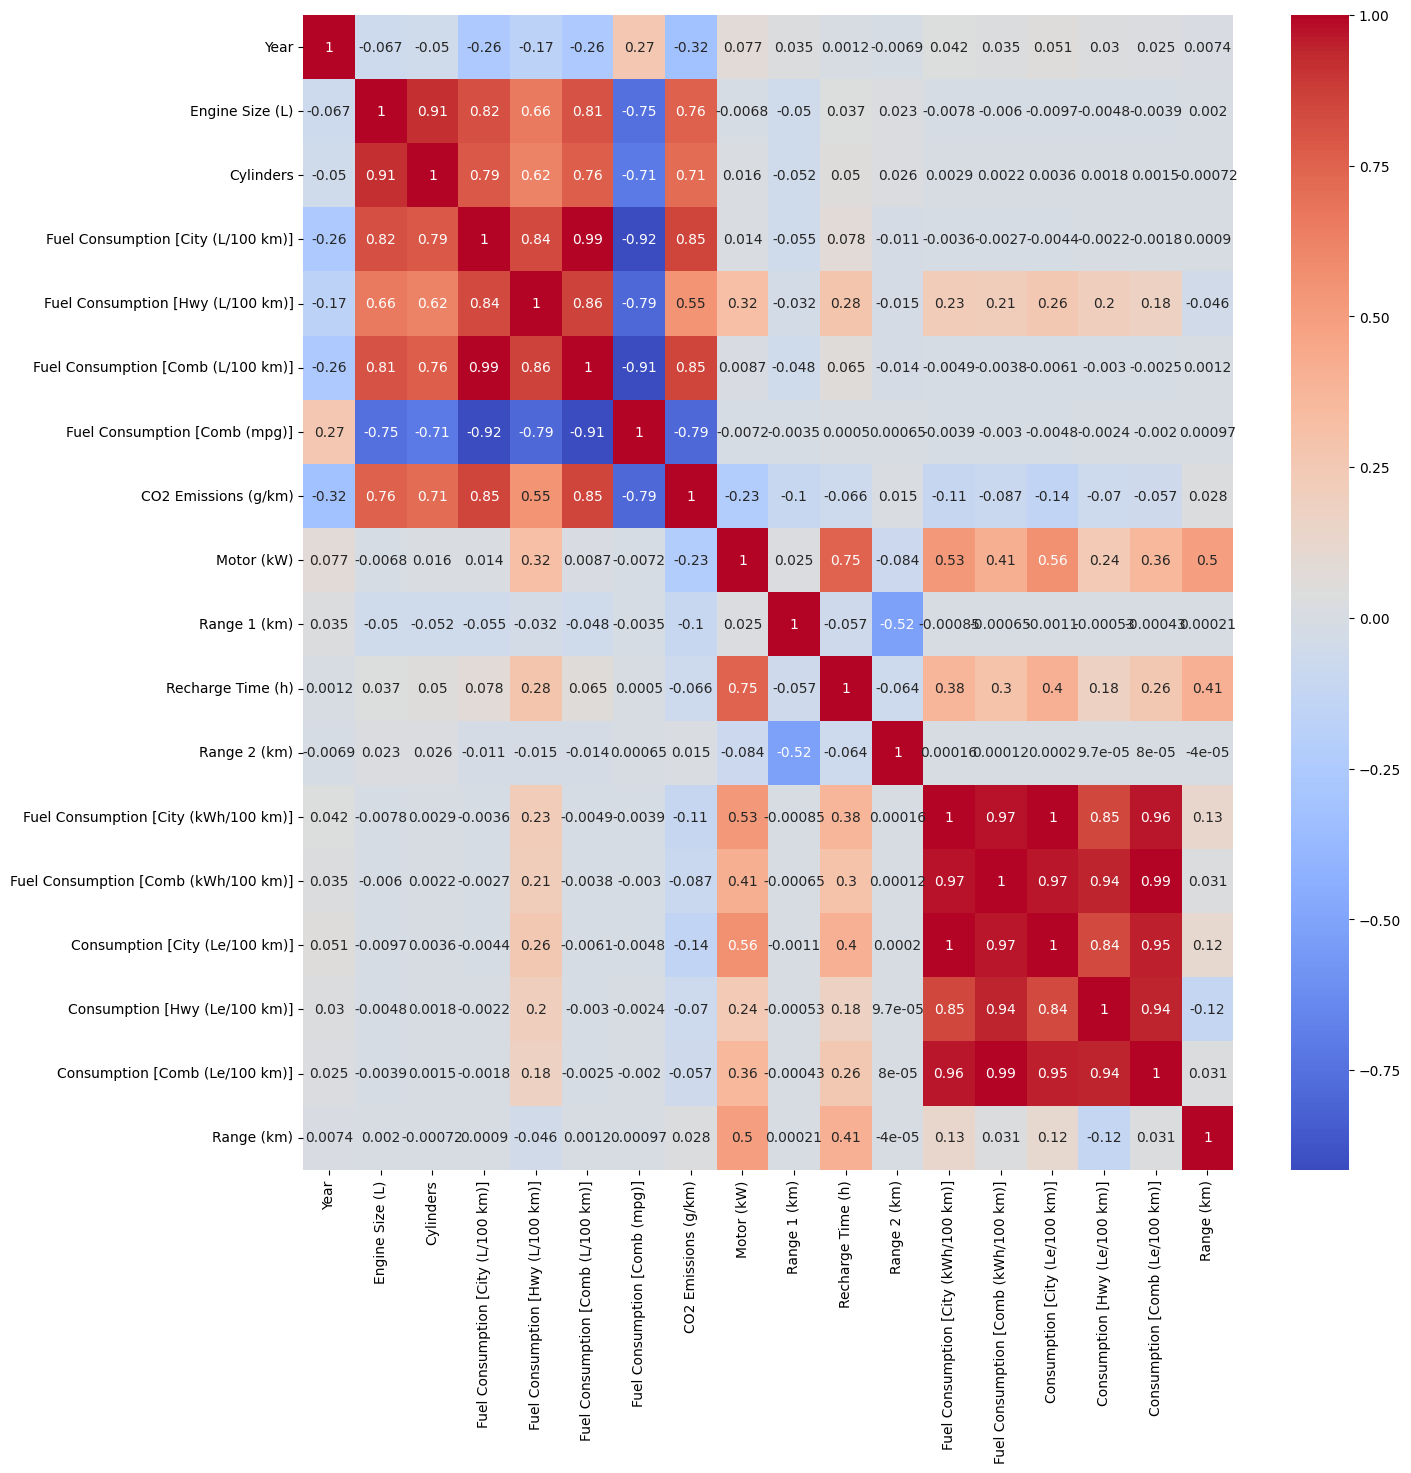

In [27]:
df_numerical_data_transformed_coeff = df_numerical_data_transformed.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data=df_numerical_data_transformed_coeff, cmap='coolwarm', annot=True)
plt.show()

#### Scaling the features helps to get better correlation among the Independent and Dependent Columns

#### Lets observe the BoxPlot for the scaled features

In [28]:
num_cols_transformed = df_numerical_data_transformed.select_dtypes(include=np.number).columns.tolist()

Year
Skew : -0.23


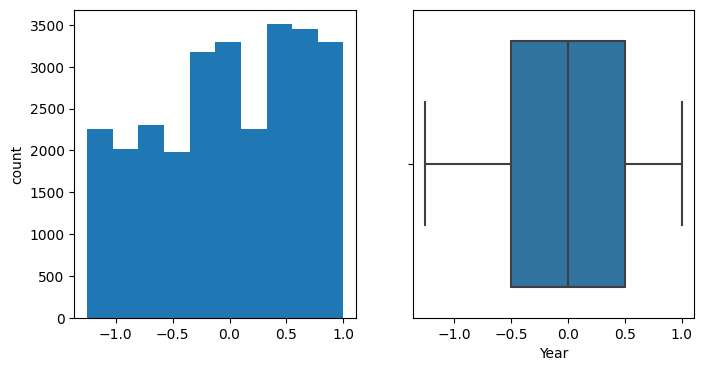

Engine Size (L)
Skew : 0.65


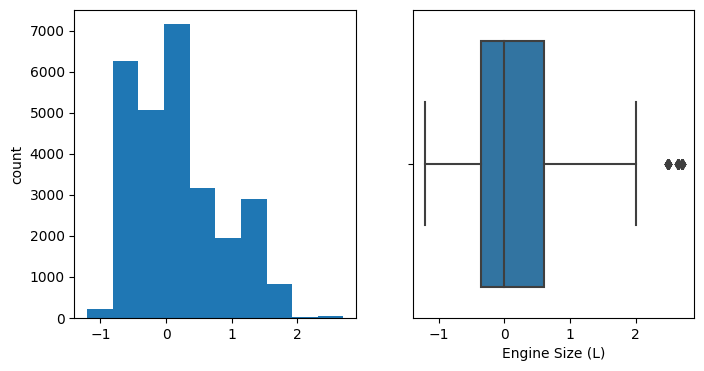

Cylinders
Skew : 0.89


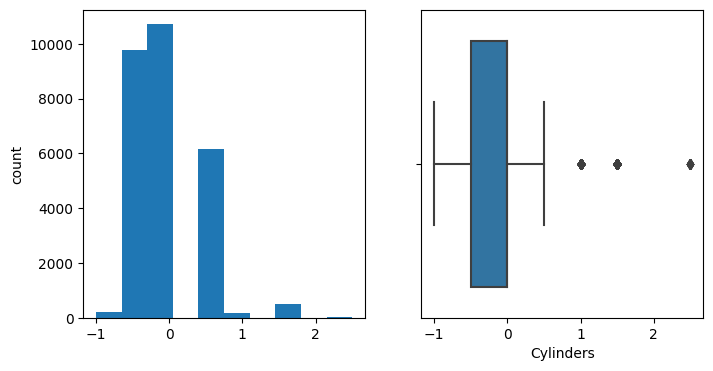

Fuel Consumption [City (L/100 km)]
Skew : 0.68


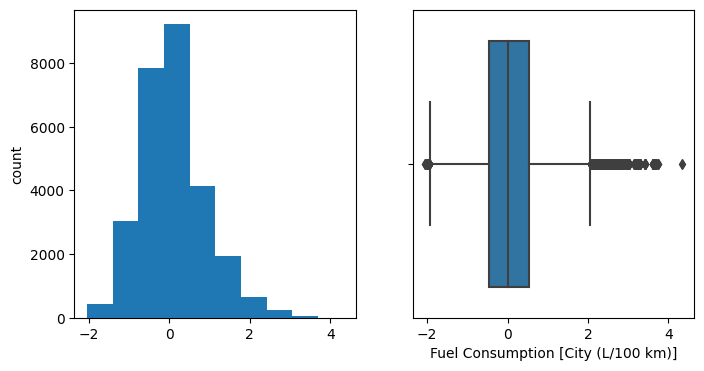

Fuel Consumption [Hwy (L/100 km)]
Skew : 1.55


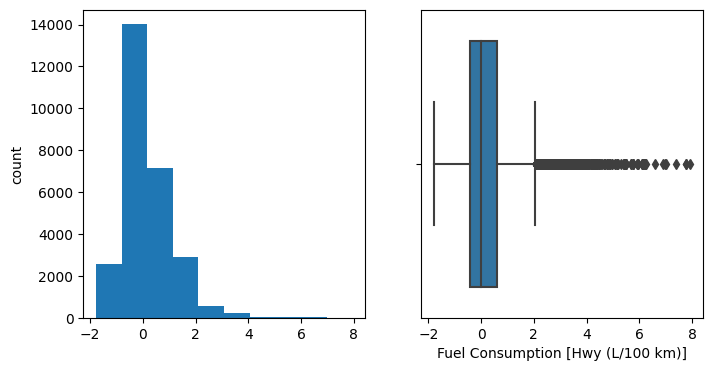

Fuel Consumption [Comb (L/100 km)]
Skew : 0.76


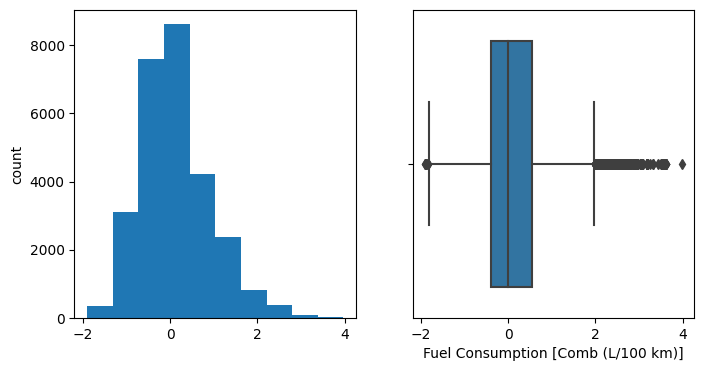

Fuel Consumption [Comb (mpg)]
Skew : 1.16


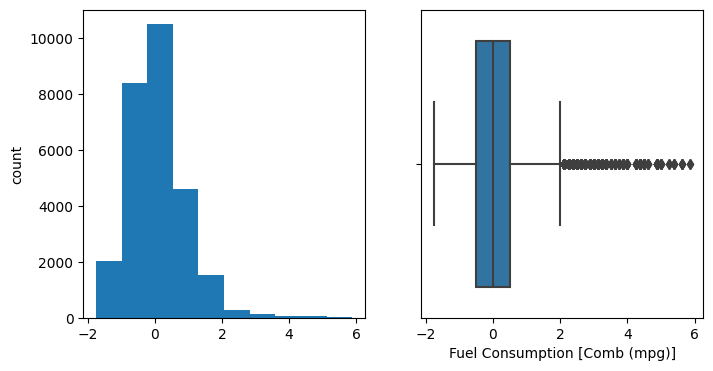

CO2 Emissions (g/km)
Skew : -0.19


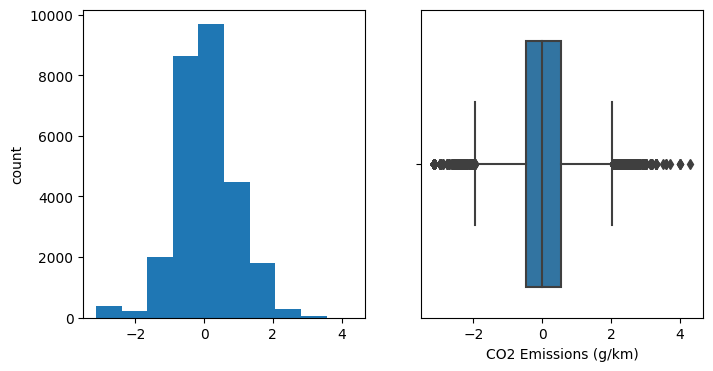

Motor (kW)
Skew : 14.11


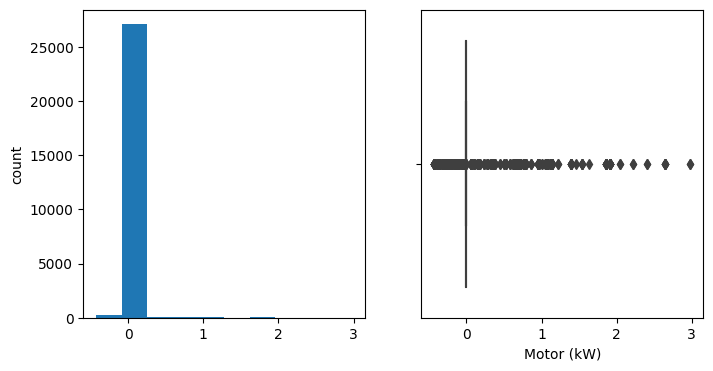

Range 1 (km)
Skew : 39.25


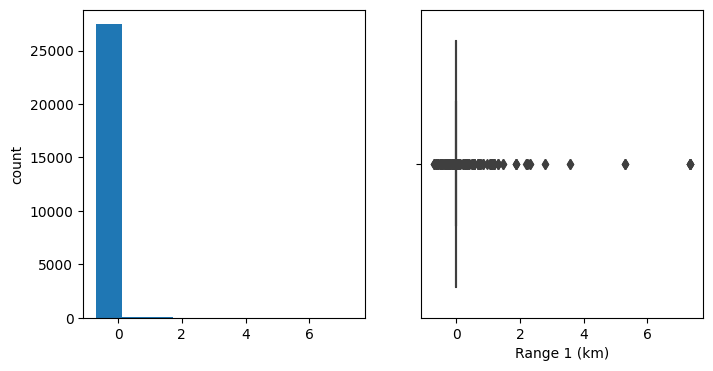

Recharge Time (h)
Skew : 0.87


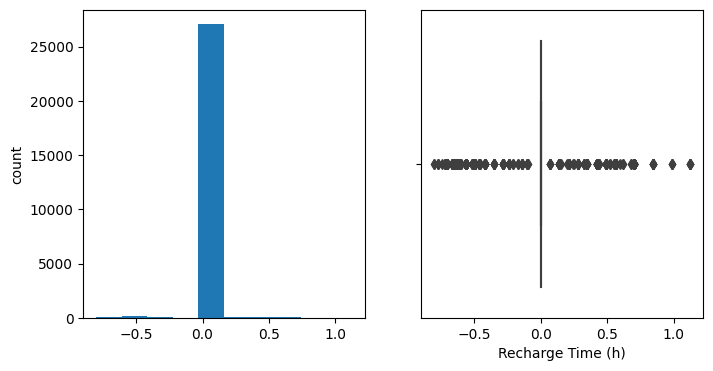

Range 2 (km)
Skew : -8.36


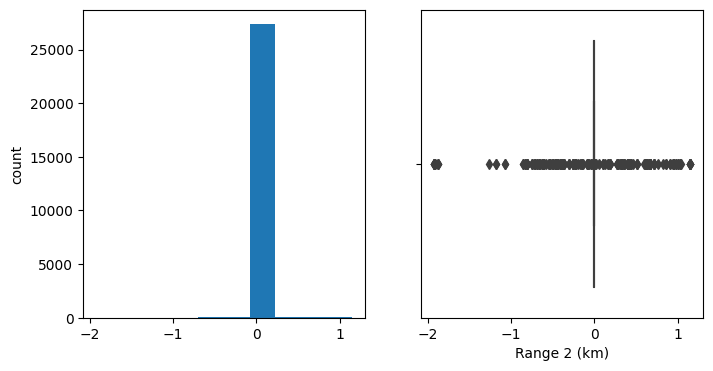

Fuel Consumption [City (kWh/100 km)]
Skew : 13.56


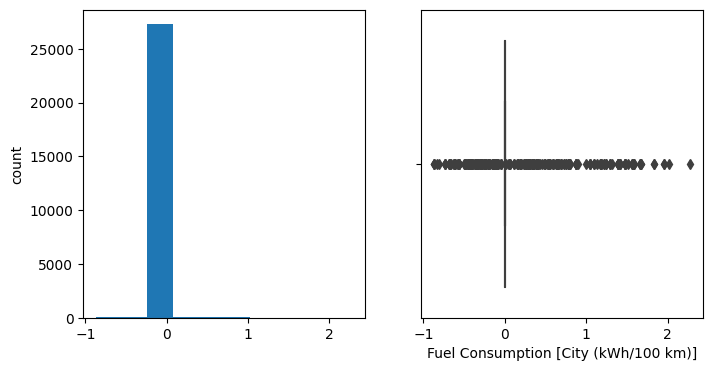

Fuel Consumption [Comb (kWh/100 km)]
Skew : 13.66


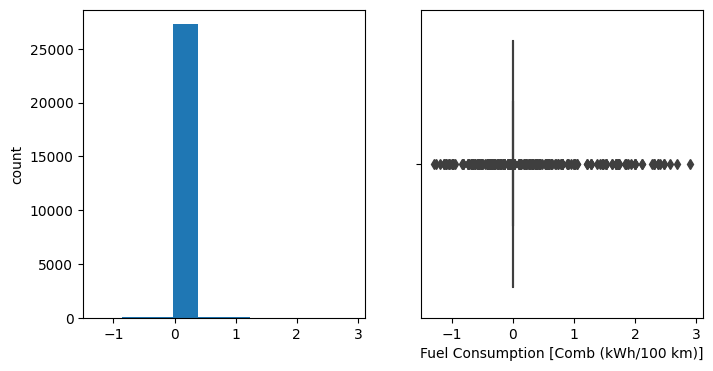

Consumption [City (Le/100 km)]
Skew : 14.71


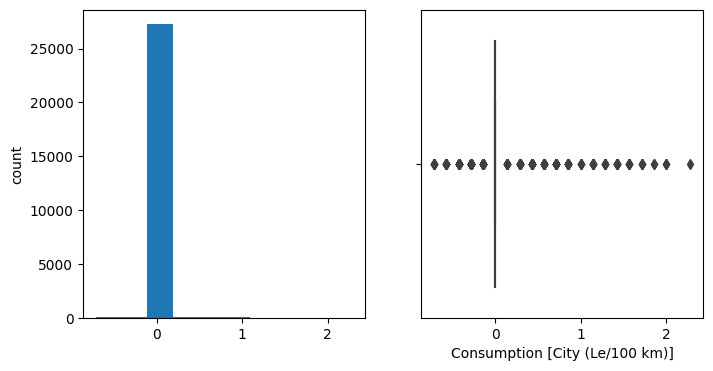

Consumption [Hwy (Le/100 km)]
Skew : 14.47


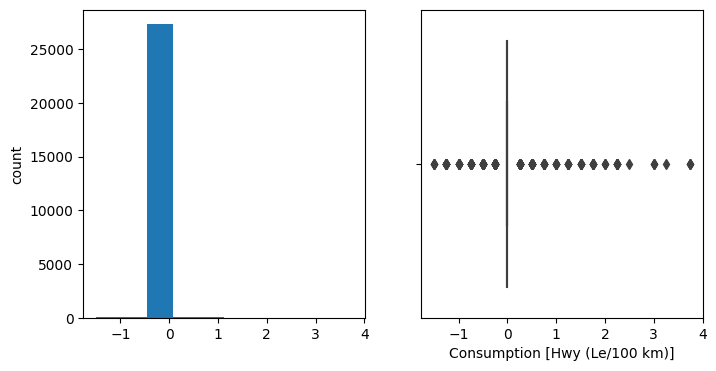

Consumption [Comb (Le/100 km)]
Skew : 12.19


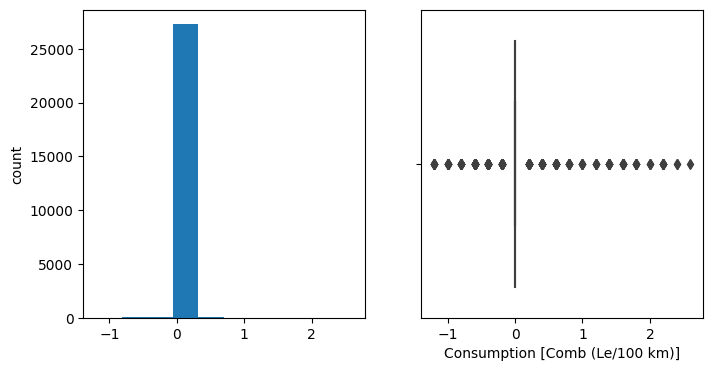

Range (km)
Skew : -2.31


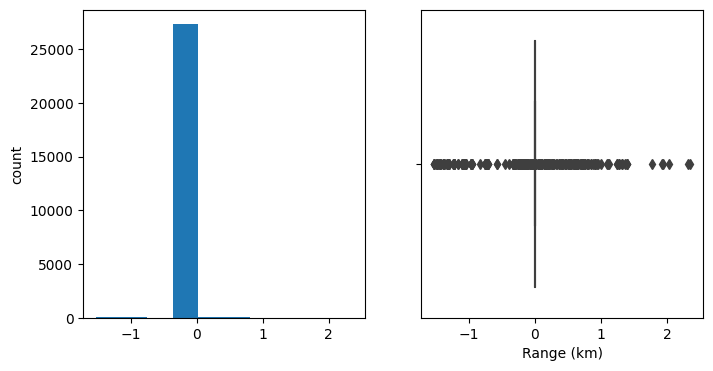

In [29]:
for col in num_cols_transformed:
    print(col)
    print('Skew :', round(df_numerical_data_transformed[col].skew(), 2))
    plt.figure(figsize = (8, 4))
    plt.subplot(1, 2, 1)
    df_numerical_data_transformed[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_numerical_data_transformed[col])
    plt.show()
plt.show()

In [30]:
df_numerical_data_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,27549.0,-0.016232,0.647660,-1.250000,-0.500000,0.0,0.500000,1.000000
Engine Size (L),27549.0,0.169313,0.666544,-1.200000,-0.350000,0.0,0.600000,2.700000
Cylinders,27549.0,-0.041989,0.446336,-1.000000,-0.500000,0.0,0.000000,2.500000
Fuel Consumption [City (L/100 km)],27549.0,0.094833,0.813285,-2.043478,-0.456522,0.0,0.543478,4.326087
Fuel Consumption [Hwy (L/100 km)],27549.0,0.172562,0.909034,-1.781250,-0.406250,0.0,0.593750,7.937500
Fuel Consumption [Comb (L/100 km)],27549.0,0.128031,0.795560,-1.900000,-0.400000,0.0,0.550000,3.975000
Fuel Consumption [Comb (mpg)],27549.0,0.104791,0.828423,-1.750000,-0.500000,0.0,0.500000,5.875000
CO2 Emissions (g/km),27549.0,0.052135,0.864135,-3.141176,-0.458824,0.0,0.541176,4.305882
Motor (kW),27549.0,0.006402,0.112965,-0.429646,0.000000,0.0,0.000000,2.981740
Range 1 (km),27549.0,0.003953,0.142000,-0.695652,0.000000,0.0,0.000000,7.347826


#### Now after scaling the numerical features, every feature is centered arnd zero, bringing the values on common scale

#### Now lets work on the Categorical features, since the cardinality is quite high in them, we need to think of something else for the convertion as compared to the conventional approach.

In [31]:
len(X_No_Year_categorical_features["Make"].unique())

507

In [32]:
X_No_Year_categorical_features["Make"] = X_No_Year_categorical_features["Make"].str.replace(r'\W', '')
len(X_No_Year_categorical_features["Make"].unique())

176

In [33]:
X_No_Year_categorical_features["Make"].unique()

array(['Acura', 'AlfaRomeo', 'AlfaRomoe', 'AstonMartin', 'Audi', 'Auid',
       'Bentley', 'BMW', 'BWM', 'Bugatti', 'Buick', 'Buikc', 'Cadillac',
       'Chevrolet', 'Chevrolte', 'Chrysler', 'Dodge', 'Dodeg', 'FIAT',
       'Ford', 'Fodr', 'Genesis', 'Genessi', 'GCM', 'GMC', 'Honda',
       'Hyundai', 'Infiniti', 'Jaguar', 'Jagura', 'Jeep', 'Jepe', 'Kia',
       'Lamborghini', 'LandRover', 'Lexsu', 'Lexus', 'Lincoln',
       'Maserati', 'Mazda', 'MercedesBenz', 'MercedesBezn', 'MINI',
       'Mitsubishi', 'Nissan', 'Nissna', 'Porsche', 'Porsceh', 'Ram',
       'RollsRoyce', 'Subaru', 'Subaur', 'Toyota', 'Volkswagen', 'Volvo',
       'Honad', 'Hyundia', 'Kai', 'Lamborghiin', 'LandRovre', 'Maserait',
       'Mazad', 'MIIN', 'Mitsubisih', 'Rma', 'RollsRoyec', 'Toyoat',
       'Infiniit', 'Linconl', 'Volkswagne', 'Volov', 'FITA', 'Cadillca',
       'Chryslre', 'ACURA', 'ACUAR', 'ALFAROMEO', 'ASTONMARTIN', 'AUDI',
       'BENTLEY', 'BUICK', 'BUIKC', 'CADILLAC', 'CHEVROLET', 'CHRYSLER',
    

In [34]:
len(X_No_Year_categorical_features["Model"].unique())

5435

In [35]:
X_No_Year_categorical_features["Model"] = X_No_Year_categorical_features["Model"].str.replace(r'\W', '')
len(X_No_Year_categorical_features["Model"].unique())

4724

In [36]:
len(X_No_Year_categorical_features["Vehicle Class"].unique())

502

In [37]:
X_No_Year_categorical_features["Vehicle Class"] = X_No_Year_categorical_features["Vehicle Class"].str.replace(r'\W', '')
len(X_No_Year_categorical_features["Vehicle Class"].unique())

58

In [38]:
X_No_Year_categorical_features["Vehicle Class"].unique()

array(['Compact', 'SUVSmall', 'SUVStandard', 'Twoseater', 'Midsize',
       'Minicompact', 'Subcompact', 'StationwagonSmall',
       'StationwagonMidsize', 'Fullsize', 'Subcompatc', 'Midsiez',
       'PickuptruckSmall', 'Twoseatre', 'PickuptruckStandard',
       'PickuptruckStandadr', 'Minivan', 'SUVStandadr',
       'Specialpurposevehicle', 'Specialpurposevehicel', 'Fullsiez',
       'Minivna', 'Compatc', 'Minicompatc', 'VanPassenger',
       'VanPassengre', 'StationwagonMidsiez', 'COMPACT', 'SUVSMALL',
       'TWOSEATER', 'MIDSIZE', 'MINICOMPACT', 'SUBCOMPACT',
       'STATIONWAGONSMALL', 'MIDSIEZ', 'FULLSIZE', 'SUVSTANDARD',
       'COMPATC', 'SUVSTANDADR', 'SPECIALPURPOSEVEHICLE',
       'PICKUPTRUCKSMALL', 'VANPASSENGER', 'PICKUPTRUCKSTANDARD',
       'PICKUPTRUCKSTANDADR', 'MINIVAN', 'FULLSIEZ',
       'STATIONWAGONMIDSIZE', 'MINIVNA', 'SUBCOMPATC', 'TWOSEATRE',
       'MINICOMPATC', 'SUV', 'STATIONWAGONMIDSIEZ', 'SVU', 'VANCARGO',
       'VANCAROG', 'VANPASSENGRE', 'UL'], dtype=

In [40]:
len(X_No_Year_categorical_features["Transmission"].unique())
X_No_Year_categorical_features["Transmission"] = X_No_Year_categorical_features["Transmission"].str.replace(r'\W', '')
len(X_No_Year_categorical_features["Transmission"].unique())

32

In [42]:
X_No_Year_categorical_features["Transmission"].unique()

array(['AM8', 'AS10', 'AM9', 'A8', 'A9', 'AM7', 'AS8', 'M6', 'AS6', 'AV',
       'AS9', 'A10', 'A6', 'M5', 'M7', 'AV7', 'AV1', 'AM6', 'AS7', 'AV8',
       'AV6', 'AV10', 'AS5', 'A7', 'A5', 'A4', 'AS4', 'AM5', 'M4', 'A3',
       'A1', 'A2'], dtype=object)

In [43]:
len(X_No_Year_categorical_features["Fuel Type"].unique())
X_No_Year_categorical_features["Fuel Type"] = X_No_Year_categorical_features["Fuel Type"].str.replace(r'\W', '')
len(X_No_Year_categorical_features["Fuel Type"].unique())

8

In [45]:
X_No_Year_categorical_features["Fuel Type"].unique()

array(['Z', 'X', 'D', 'E', 'N', nan, '', 'B'], dtype=object)

In [46]:
len(X_No_Year_categorical_features["Fuel Type 1"].unique())
X_No_Year_categorical_features["Fuel Type 1"] = X_No_Year_categorical_features["Fuel Type 1"].str.replace(r'\W', '')
len(X_No_Year_categorical_features["Fuel Type 1"].unique())

4

In [47]:
X_No_Year_categorical_features["Fuel Type 1"].unique()

array([nan, 'B', 'BX', 'BZ'], dtype=object)

In [49]:
X_No_Year_categorical_features["Fuel Type 2"].unique()

array([nan, 'Z', 'X'], dtype=object)

In [39]:
# Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type',
#        'Fuel Type 1', 'Fuel Consumption Combined Le/100 km', 'Fuel Type 2'],
#       dtype='object')